In [52]:
import pandas as pd
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [17]:
raw_data = pd.read_csv(r"../data/processed_data/oversampled_test.csv", index_col=0)

In [18]:
raw_data[raw_data.TARGET == 0]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
111441,1,4,6,7,0,90000.0,225000.0,12694.5,225000.0,8,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
269625,1,4,6,7,0,270000.0,842076.0,79951.5,810000.0,8,...,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0,0
80410,1,3,7,7,0,292500.0,790830.0,62613.0,675000.0,8,...,0,0,0,0.0,0.0,0.0,0.0,2.0,9.0,0
168580,1,4,7,7,0,125100.0,247275.0,19548.0,225000.0,8,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
117111,1,3,6,6,0,99000.0,397881.0,12190.5,328500.0,9,...,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137337,1,4,6,7,1,157500.0,787500.0,23157.0,787500.0,8,...,0,0,0,0.0,0.0,0.0,0.0,2.0,1.0,0
54886,1,4,6,7,0,180000.0,747000.0,53122.5,747000.0,8,...,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0,0
110268,2,3,7,7,2,202500.0,270000.0,13500.0,270000.0,8,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
259178,1,4,6,6,2,225000.0,509922.0,40419.0,472500.0,10,...,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,0


In [19]:
x = raw_data.drop(["TARGET"], axis=1)
y = raw_data.filter(["TARGET"], axis=1)

scaler = (
    StandardScaler()
)  # MinMaxScaler often made values = 0.0, which = lost features in training
x_scaled = scaler.fit_transform(x)
# y = scaler.fit_transform(y)
# y = y.values  # we dont need to scale our binary classification

# x_scaled = x_scaled.reshape(x_scaled.shape[0], x_scaled.shape[1], )  # data needs to be 3D for a CNN

x_scaled.shape, y.shape

((84806, 120), (84806, 1))

In [20]:
# load trained model
model = tf.keras.models.load_model(r"../models/BayOpt_v1.01")

In [21]:
y_pred = model.predict(x_scaled)

2651/2651 [==============================] - 10s 4ms/step


In [42]:
# convert continuous data to binary 
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

In [46]:
# convert continuous data to binary 
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# createa a dataframe to house the predictions and true
y_results = pd.DataFrame()
y_results["y_true"] = y
y_results["y_pred"] = y_pred_binary

y_results.head()

,y_true,y_pred
111441,0,0
493644,1,1
269625,0,0
423712,1,1
80410,0,0


In [44]:
# Performance metrics
print(f"{'-'*10} Evaluation Metrics {'-'*10}")

accuracy = accuracy_score(y_results["y_true"], y_results["y_pred"])
print(f"Accuracy: {'%.3f' % accuracy}")

precision = precision_score(y_results["y_true"], y_results["y_pred"])
print(f"Precision: {'%.3f' % precision}")

recall = recall_score(y_results["y_true"], y_results["y_pred"])
print(f"Recall: {'%.3f' % recall}")

f1 = f1_score(y_results["y_true"], y_results["y_pred"])
print(f"F1_score: {'%.3f' % f1}")

auc = roc_auc_score(y_results["y_true"], y_results["y_pred"])
print(f"AUC_score: {'%.3f' % auc}")

# print(classification_report(y_results["y_true"], y_results["y_pred"]))

---------- Evaluation Metrics ----------
Accuracy: 0.917
Precision: 0.965
Recall: 0.865
F1_score: 0.912
AUC_score: 0.917


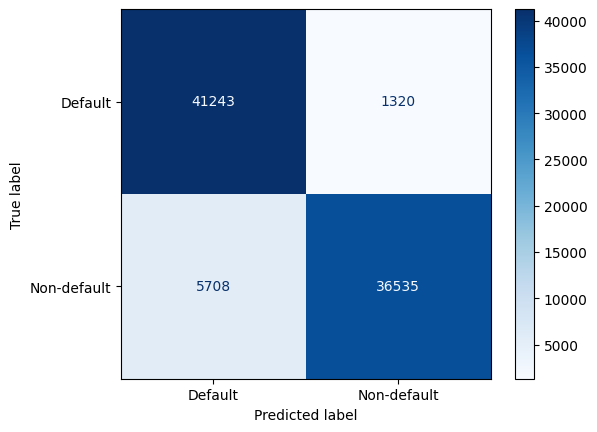

In [54]:
con_matrix = confusion_matrix(y_results["y_true"], y_results["y_pred"])

disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=["Default", "Non-default"])
disp.plot(cmap=plt.cm.Blues)